In [1]:
import numpy as np

In [16]:
# liste : conteneur généraliste peut stocker npt quoi /pas optimisé pour calcul numérique (opérations éléments par éléments en boucle lent )
a= [1,2,"d"]
b= [4,5,6]

c = a+b
c

[1, 2, 'd', 4, 5, 6]

In [21]:
# array : tableau homogène, optimisé pour calcul vectorisé 
a = np.array([1,2,3])
b = np.array([1,5,6])

c = a+b
c

m = a*b
m

array([ 1, 10, 18])

In [7]:
d = np.concatenate([a,b])
d

array([1, 2, 3, 4, 5, 6])

In [ ]:
# Fonction .dot (somme des produits)

poids = np.array([0.2, 0.5, 0.3])
rendements = np.array([0.01, -0.02, 0.015])

ptf = np.dot(poids,rendements)
ptf



-0.0035000000000000005

In [15]:
# aussi pour produit matrices/vecteurs

M = np.array([[1,2],[3,7]])
v = np.array([5,6])

res= np.dot(M,v)
res

array([17, 57])

In [19]:
# @ opération pour .dot

M1= np.array([[3,4],[6,8]])
M2 = np.array([[7,8],[8,9]])

M1 @ M2 

array([[ 53,  60],
       [106, 120]])

Création et initialisation 

In [ ]:


a = np.zeros(5)
a

array([0., 0., 0., 0., 0.])

In [26]:
b = np.ones(3)
b

array([1., 1., 1.])

In [ ]:
c=np.arange(0,16,4) # construit une liste avec incrément / n'inclut pas stop
c

array([ 0,  4,  8, 12])

In [ ]:
d = np.linspace(0,16,4) # tu donnes le nb de points à générer / inclut stop
d

array([ 0.        ,  5.33333333, 10.66666667, 16.        ])

In [33]:
# générer une loi normale : 
n = np.random.normal(0,1,5)
n

array([ 0.21448638, -0.34902535,  1.57959639, -0.0438193 , -0.29293149])

Indexation et slicing 

In [36]:
x = np.array([10,20,30,40,60])
y = x[1:3]
y

f= x[x>25]
f

array([30, 40, 60])

In [ ]:
x = np.array([10,20.8,33.4,45.6,6.5])
x.mean()
x.std()
x.var()


212.9344

In [ ]:
# Monte carlo simulation 

class Simulator:

    def __init__(self,M,N,vol,S0):
        
        self.S0     = S0
        self.dt     = 1/252
        self.vol    = vol
        self.M      = M  # une ligne c'est un chemin pris par le SJ 
        self.N      = N
        self.S      = np.full((M,N),0.0)
        self.S[:,0] = self.S0

    def simulate(self):

        rdm = np.random.normal(0,1,(self.M,self.N-1)) # N-1 car S0 pas d'alea

        drift = -0.5*self.vol**2*self.dt
        diff = self.vol*np.sqrt(self.dt)*rdm

        self.S[:,1:] = self.S[:,[0]]*np.exp(np.cumsum(drift+diff,axis=1))
        return self.S
    

array([[100.        ,  98.25282723,  96.39115643, ...,  89.66463498,
         89.62771799,  87.95686239],
       [100.        ,  98.66384053, 100.64761459, ...,  99.02186834,
        100.58485157, 100.87251512],
       [100.        ,  99.7467653 ,  99.61478297, ..., 105.76426262,
        105.58453841, 103.37581703],
       ...,
       [100.        ,  98.73204561, 100.50436822, ...,  93.61165115,
         94.06042051,  92.21513024],
       [100.        , 100.21924992,  98.69515795, ...,  95.02918634,
         94.94938781,  94.52772519],
       [100.        , 100.37407246,  99.46669211, ..., 102.19491322,
        101.48077632, 103.00693501]])

In [55]:
S0=10
vol=0.2
M=10000
N=22

test = Simulator(M,N,vol,S0)
S=test.simulate()
S

array([[10.        , 10.12560104, 10.053804  , ..., 10.63569164,
        10.62577253, 10.58986329],
       [10.        ,  9.99449726,  9.90402759, ...,  9.62547895,
         9.27210644,  9.10706609],
       [10.        ,  9.83510708,  9.8595876 , ..., 10.19297508,
        10.06896286, 10.04960513],
       ...,
       [10.        , 10.02361945, 10.26411659, ..., 10.59052867,
        10.41949563, 10.43447683],
       [10.        , 10.10174817, 10.20091304, ..., 11.90790546,
        11.98629409, 12.09223497],
       [10.        , 10.24428059, 10.16619396, ..., 10.25045975,
        10.39072382, 10.53807718]])

 ...]

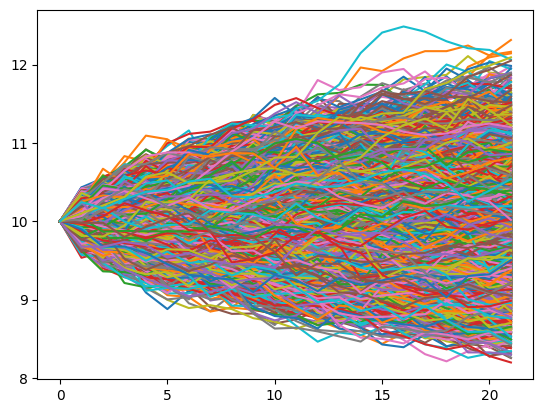

In [56]:
import matplotlib.pyplot as plt

plt.plot(S[:10000].T)